In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

In [ ]:
corona_dataset_csv = pd.read_csv("Datasets/covid19_Confirmed_dataset.csv")
corona_dataset_csv.head(10)

In [ ]:
corona_dataset_csv.shape

In [5]:
df = corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)

In [7]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

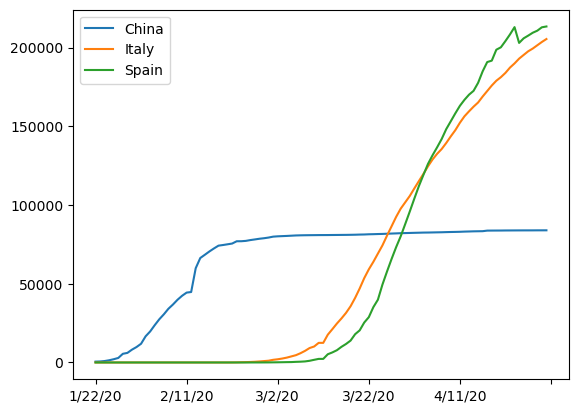

In [10]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
plt.legend()

<AxesSubplot: >

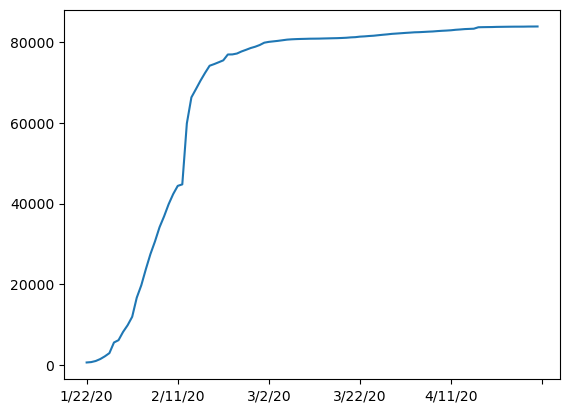

In [11]:
corona_dataset_aggregated.loc['China'].plot()

<AxesSubplot: >

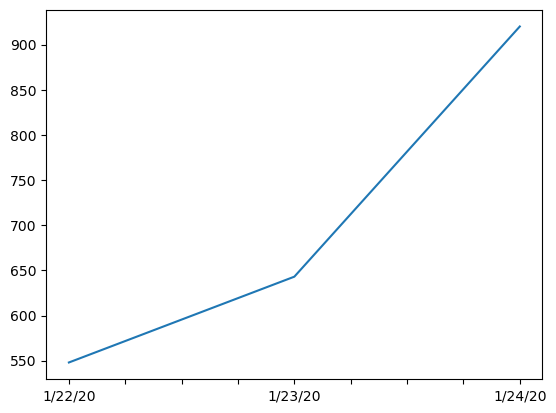

In [12]:
corona_dataset_aggregated.loc["China"][:3].plot()

<AxesSubplot: >

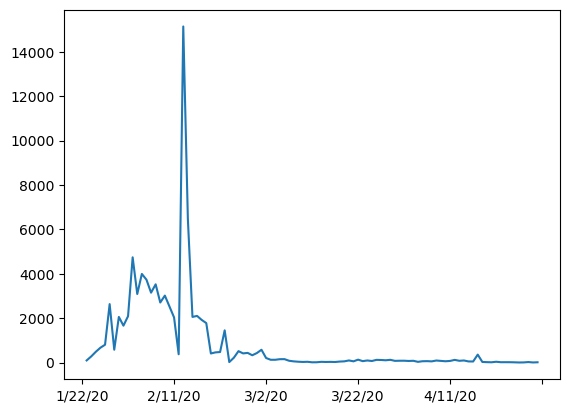

In [13]:
corona_dataset_aggregated.loc["China"].diff().plot()

In [14]:
corona_dataset_aggregated.loc["China"].diff().max()

15136.0

In [15]:
corona_dataset_aggregated.loc["Italy"].diff().max()

6557.0

In [16]:
corona_dataset_aggregated.loc["Spain"].diff().max()

9630.0

In [17]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_infection_rate"] = max_infection_rates

In [18]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [19]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])

In [20]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [21]:
happiness_report_csv = pd.read_csv("Datasets/worldwide_happiness_report.csv")

In [22]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [23]:
useless_cols = ["Overall rank","Score","Generosity", "Perceptions of corruption"]

In [24]:
happiness_report_csv.drop(useless_cols,axis = 1, inplace = True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [25]:
happiness_report_csv.set_index("Country or region",inplace=True)
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [31]:
data = corona_data.join(happiness_report_csv,how="inner")
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


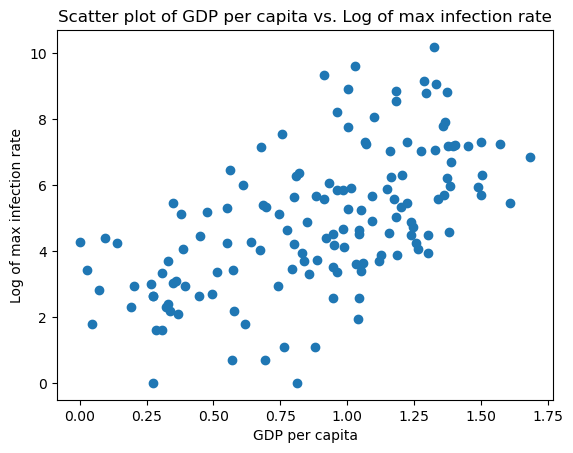

In [40]:
x = data["GDP per capita"]
y = data["max_infection_rate"]

plt.scatter(x, np.log(y))
plt.xlabel("GDP per capita")
plt.ylabel("Log of max infection rate")
plt.title("Scatter plot of GDP per capita vs. Log of max infection rate")
plt.show()

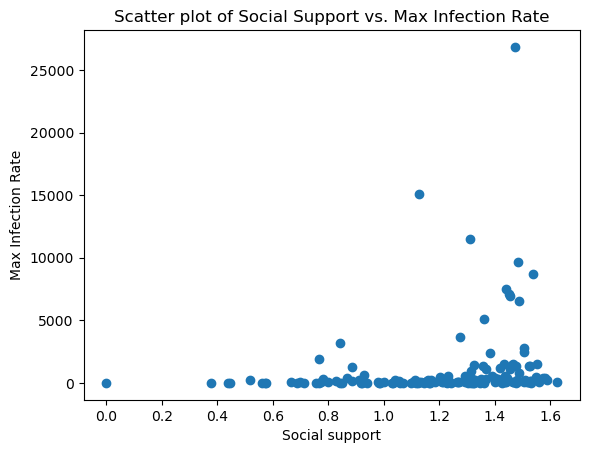

In [52]:
x = data["Social support"]
y = data["max_infection_rate"]

# Create a scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("Social support")
plt.ylabel("Max Infection Rate")
plt.title("Scatter plot of Social Support vs. Max Infection Rate")

# Show the plot
plt.show()

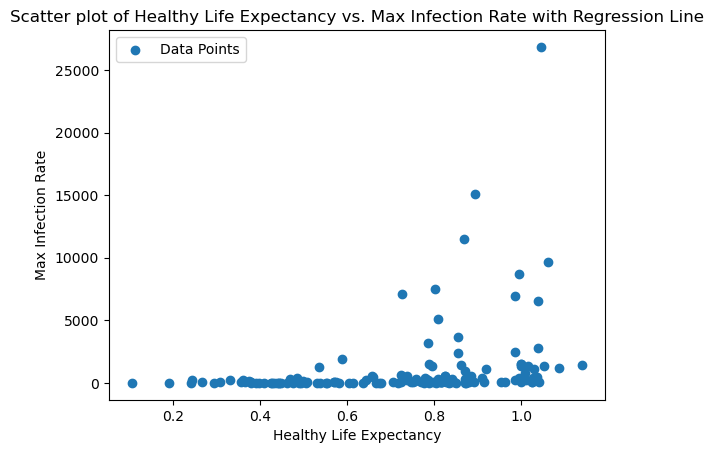

In [53]:
x = data["Healthy life expectancy"]
y = data["max_infection_rate"]

# Create a scatter plot
plt.scatter(x, y, label='Data Points')
plt.xlabel("Healthy Life Expectancy")
plt.ylabel("Max Infection Rate")
plt.title("Scatter plot of Healthy Life Expectancy vs. Max Infection Rate with Regression Line")

# Add a legend
plt.legend()

# Show the plot
plt.show()

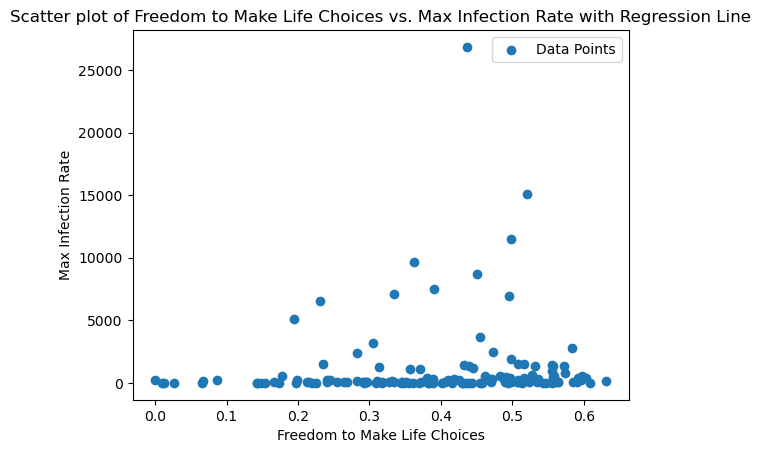

In [54]:
x = data["Freedom to make life choices"]
y = data["max_infection_rate"]

# Create a scatter plot
plt.scatter(x, y, label='Data Points')
plt.xlabel("Freedom to Make Life Choices")
plt.ylabel("Max Infection Rate")
plt.title("Scatter plot of Freedom to Make Life Choices vs. Max Infection Rate with Regression Line")

# Add a legend
plt.legend()

# Show the plot
plt.show()